<a href="https://colab.research.google.com/github/joelsmith11/StockPrediction/blob/main/AmazonStockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amazon Stock Price Prediction

I have posted a detailed writeup regarding this article, including technical details and analysis of results on my website, linked [here](https://joel-smith.carrd.co/#amzn). Please visit that writeup for more details. Thanks!


This code was based on Avery Smith's article regarding stock predcition; see link to article [here](https://medium.datadriveninvestor.com/predicting-the-stock-market-with-python-bba3cf4c56ef) and code [here](https://gist.github.com/AveryData/d6abae0b23bc310ef39de34d37e452ba#file-predict-the-stock-market-with-python-just-code-ipynb)



In [ ]:
import sys 

In [ ]:
# set ticker for stock to pick
tickerSymbol = 'AMZN'

# pick date range (formatted as 'YYYY-MM-DD')
start = '2015-04-01'
end = '2020-01-01'

In [ ]:
!pip install yfinance
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 67.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 27.3 MB/s eta 0:00:00
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting un

In [ ]:
# make a Ticker object
tickerData = yf.Ticker(tickerSymbol)

# get the historical data and store in a df
df = tickerData.history(start = start, end = end)

df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-04-01 00:00:00-04:00,18.605000,18.658001,18.417000,18.513000,49162000,0.0,0.0
2015-04-02 00:00:00-04:00,18.525000,18.664000,18.450001,18.612499,37506000,0.0,0.0
2015-04-06 00:00:00-04:00,18.504999,19.010000,18.468000,18.851999,61014000,0.0,0.0
2015-04-07 00:00:00-04:00,18.807501,18.965500,18.701500,18.720501,39098000,0.0,0.0
2015-04-08 00:00:00-04:00,18.733000,19.079000,18.732500,19.059999,52728000,0.0,0.0


In [ ]:
import pandas as pd 
import numpy as np 

In [ ]:
# This will eventually become a scores df that stores the scores
# of all our different models
scores = []

In [ ]:
# Here, we're going to change the date from a string object to a pd date time col
date_format = '%Y-%m-%d'

# Set the index to a new Date column, then change the date to datetime format
df['Date'] = df.index

df['Date'] = pd.to_datetime(df['Date'], format = date_format)

Dates = df['Date']

### TA Package
The TA package is a package that allows us to do technical analysis to financial data. It includes many different metrics like volatility, trends, momentum, and others

See definitions here: [Dictionary](https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html)

In [ ]:
!pip install ta
from ta import add_all_ta_features

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29106 sha256=6711b59813ccb4a0f613d439ac41c4fed4e051f0d1db32cb46cce2b74b4d7aa4
  Stored in directory: /root/.cache/pip/wheels/6a/76/03/7f785aaa50b9c6ec7e3fd105a62c1b2c45a034512d51e024a9
Successfully built ta


In [ ]:
!pip install fastai==1.0.61
from fastai.tabular import add_datepart, add_cyclic_datepart

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.2/239.2 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.1/353.1 KB 31.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19190 sha256=9d820c652f8a3a1b8d33299cdc3daa6645d0e1d3ff110e0add6a74abe798cce3
  Stored in directory: /root/.cache/pip/wheels/f6/d8/b0/15cfd7805d39250ac29318105f09b1750683387630d68423e1
Successfully built nvidia-ml-py3
  Attempting uninstall: fastai
    Found existing installation: fastai 2.7.11
    Uninstalling fastai-2.7.11:
      Successfully uninstalled fastai-2.7.11


In [ ]:
# Define date parts with fastai.tabular
add_datepart(df, 'Date', drop = 'True')

# Ensure format
df['Date'] = pd.to_datetime(df.index.values, format = date_format)

# Add date parts
add_cyclic_datepart(df, 'Date', drop='True')

/usr/local/lib/python3.9/dist-packages/fastai/tabular/transform.py:63: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  for n in attr: df[prefix + n] = getattr(field.dt, n.lower())
/usr/local/lib/python3.9/dist-packages/fastai/tabular/transform.py:64: FutureWarning: casting datetime64[ns, America/New_York] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df[prefix + 'Elapsed'] = field.astype(np.int64) // 10 ** 9


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Week,...,Is_year_start,Elapsed,weekday_cos,weekday_sin,day_month_cos,day_month_sin,month_year_cos,month_year_sin,day_year_cos,day_year_sin
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-01 00:00:00-04:00,18.605000,18.658001,18.417000,18.513000,49162000,0.0,0.0,2015,4,14,...,False,1427860800,-0.222521,0.974928,1.000000,0.000000,6.123234e-17,1.0,0.021516,0.999769
2015-04-02 00:00:00-04:00,18.525000,18.664000,18.450001,18.612499,37506000,0.0,0.0,2015,4,14,...,False,1427947200,-0.900969,0.433884,0.978148,0.207912,6.123234e-17,1.0,0.004304,0.999991
2015-04-06 00:00:00-04:00,18.504999,19.010000,18.468000,18.851999,61014000,0.0,0.0,2015,4,15,...,False,1428292800,1.000000,0.000000,0.500000,0.866025,6.123234e-17,1.0,-0.064508,0.997917
2015-04-07 00:00:00-04:00,18.807501,18.965500,18.701500,18.720501,39098000,0.0,0.0,2015,4,15,...,False,1428379200,0.623490,0.781831,0.309017,0.951057,6.123234e-17,1.0,-0.081676,0.996659
2015-04-08 00:00:00-04:00,18.733000,19.079000,18.732500,19.059999,52728000,0.0,0.0,2015,4,15,...,False,1428465600,-0.222521,0.974928,0.104528,0.994522,6.123234e-17,1.0,-0.098820,0.995105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24 00:00:00-05:00,89.690498,89.778503,89.378998,89.460503,17626000,0.0,0.0,2019,12,52,...,False,1577163600,0.623490,0.781831,-0.050649,-0.998717,8.660254e-01,-0.5,0.990532,-0.137279
2019-12-26 00:00:00-05:00,90.050499,93.523003,89.974998,93.438499,120108000,0.0,0.0,2019,12,52,...,False,1577336400,-0.900969,0.433884,0.347305,-0.937752,8.660254e-01,-0.5,0.994671,-0.103102
2019-12-27 00:00:00-05:00,94.146004,95.070000,93.300499,93.489998,123732000,0.0,0.0,2019,12,52,...,False,1577422800,-0.900969,-0.433884,0.528964,-0.848644,8.660254e-01,-0.5,0.996298,-0.085965


In [ ]:
# The shifts list holds how many days out we want to do our prediction
shifts = [1, 5, 10, 20]

# train split (75% train, 25% test)
train_split = 0.75

# plotting dimensions
w = 16
h = 4

## Helper Functions
These helper functions were written by Avery Smith as a part of his article. 

CorrectColumnTypes does what it says: ensures that the column types are the correct type so that we can use them in our prediction. 

CreateLags is used to shift our dataframe so that we can add our prediction to the dataframe. We need this, for example, when we're predicting 10 days out, because we need to also predict the 1st through 9th days so we can predict that 10th day.

SplitData is used to create a train/test split.

PlotModelResults is used to generate a line plot to easily compare the actual result and our predicted result.

In [ ]:
# Ensure column types are correct

def CorrectColumnTypes(df):
  # Input: dataframe 
  # ouptut: dataframe (with column types changed)

  # Numbers
  for col in df.columns[1:80]:
      df[col] = df[col].astype('float')

  for col in df.columns[-10:]:
      df[col] = df[col].astype('float')

  # Categories 
  for col in df.columns[80:-10]:
      df[col] = df[col].astype('category')

  return df 

In [ ]:
# This function is required so that we can move our closing costs by
# the number of days we requesting to predict for in the future

# Create the lags 
def CreateLags(df,lag_size):
  # inputs: dataframe , size of the lag (int)
  # ouptut: dataframe ( with extra lag column), shift size (int)

  # add lag
  shift = -lag_size
  df['Close_lag'] = df['Close'].shift(shift)
  return df, shift

In [ ]:
# Split the testing and training data 
def SplitData(df, train_pct, shift):
  # inputs: dataframe , training_pct (float between 0 and 1), size of the lag (int)
  # ouptut: x train dataframe, y train data frame, x test dataframe, 
  #         y test dataframe, train data frame, test dataframe

  train_pt = int(len(df)*train_pct)
  
  train = df.iloc[:train_pt,:]
  test = df.iloc[train_pt:,:]
  
  x_train = train.iloc[:shift,1:-1]
  y_train = train['Close_lag'][:shift]
  x_test = test.iloc[:shift,1:-1]
  y_test = test['Close'][:shift]

  return x_train, y_train, x_test, y_test, train, test

In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import plotly.graph_objs as go

In [ ]:
# Function to make the plots
def PlotModelResults_Plotly(train, test, pred, ticker, w, h, shift_days, name):
  # inputs: train dataframe: training dataframe 
  #         test dataframe: test data df
  #         predicted value (list): predicted values from the model 
  #         ticker ('string'): company stock ticker we're predicting
  #         width (int): width of the plot
  #         height (int): height of the plot
  #         shift size (int): how many days in the future we're predicting
  #         name (string): name of the company
  # output: None

  # Create lines of the training actual, testing actual, prediction 
  D1 = go.Scatter(x=train.index,y=train['Close'],name = 'Train Actual') # Training actuals
  D2 = go.Scatter(x=test.index[:shift_days],y=test['Close'],name = 'Test Actual') # Testing actuals
  D3 = go.Scatter(x=test.index[:shift_days],y=pred,name = 'Our Prediction') # Testing predction

  # Combine in an object  
  line = {'data': [D1,D2,D3],
          'layout': {
              'xaxis' :{'title': 'Date'},
              'yaxis' :{'title': '$'},
              'title' : name + ' - ' + tickerSymbol + ' - ' + str(shift_days)
          }}
  # Send object to a figure 
  fig = go.Figure(line)

  # Show figure
  fig.show()

## Original Method
Below is the original method found in Avery's article that uses a Linear Regression and MLP Regressor, both from Scikit-learn.


In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=fa2fb4dccd787e309dd9669ee167a14b547f90821087e3fd5e8a4f1547c7b96a
  Stored in directory: /root/.cache/pip/wheels/f8/e0/3d/9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression 
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

In [ ]:
# regression fxn
linreg_scores = []
def LinearRegression_fxn(x_train, y_train, x_test, y_test, days_out):
  # inputs: x_train: training data, inputs
  #         y_train: training data, results
  #         x_test: testing data, inputs
  #         y_test: testing data, results
  # outputs: predicted values for test data, in a list

  lr = LinearRegression()
  lr.fit(x_train, y_train)
  lr_pred = lr.predict(x_test)
  lr_MSE = mean_squared_error(y_test, lr_pred)
  lr_R2 = lr.score(x_test, y_test)
  print('Linear Regression R2: {}'.format(lr_R2))
  print('Linear Regression MSE: {}'.format(lr_MSE))

  linreg_scores.append({'model_name':'Linear Regression',
                        'days_out': days_out,
                        'r2': lr_R2,
                        'mse': lr_MSE})

  return lr_pred

In [ ]:
# ANN function using sklearn MLP classifier
mlpreg_scores = []
def ANN_func(x_train, y_train, x_test, y_test, days_out):
  # inputs: x_train: training data, inputs
  #         y_train: training data, results
  #         x_test: testing data, inputs
  #         y_test: testing data, results
  # outputs: predicted values for test data, in a list

  # scale the data so that the ANN can effectively use it
  scaler = StandardScaler()
  x_train_scaled = scaler.fit_transform(x_train)
  x_test_scaled = scaler.transform(x_test)

  mlp = MLPRegressor(random_state = 42
                     , max_iter = 1000
                     , hidden_layer_sizes = (100,)
                     , activation = 'identity'
                     , learning_rate = 'adaptive').fit(x_train_scaled, y_train)

  mlp_pred = mlp.predict(x_test_scaled)
  mlp_mse = mean_squared_error(y_test, mlp_pred)
  mlp_R2 = mlp.score(x_test_scaled, y_test)

  print('Multi-layer Perceptron R2 Test: {}'.format(mlp_R2))
  print('Multi-layer Perceptron MSE: {}'.format(mlp_mse))

  mlpreg_scores.append({'model_name':'MLP Regressor',
                        'days_out': days_out,
                        'r2': mlp_R2,
                        'mse': mlp_mse})

  return mlp_pred

In [ ]:
def CalcProfit(test_df,pred,j):
  pd.set_option('mode.chained_assignment', None)
  test_df['pred'] = np.nan
  test_df['pred'].iloc[:-j] = pred
  test_df['change'] = test_df['Close_lag'] - test_df['Close'] 
  test_df['change_pred'] = test_df['pred'] - test_df['Close'] 
  test_df['MadeMoney'] = np.where(test_df['change_pred']/test_df['change'] > 0, 1, -1) 
  test_df['profit'] = np.abs(test['change']) * test_df['MadeMoney']
  profit_dollars = test['profit'].sum()
  print('Would have made: $ ' + str(round(profit_dollars,1)))
  profit_days = len(test_df[test_df['MadeMoney'] == 1])
  print('Percentage of good trading days: ' + str( round(profit_days/(len(test_df)-j),2))     )

  return test_df, profit_dollars

In [ ]:
# go through each shift

for i in shifts:
  print(str(i) + ' day(s) out:')
  print('---------------')
  df_lag, shift = CreateLags(df, i)
  df_lag = CorrectColumnTypes(df_lag)
  x_train, y_train, x_test, y_test, train, test = SplitData(df, train_split, shift)

  # linear regression
  print('Linear Regression')
  lr_pred = LinearRegression_fxn(x_train, y_train, x_test, y_test, i)
  test2, profit_dollars = CalcProfit(test, lr_pred, i)
  PlotModelResults_Plotly(train, test, lr_pred, tickerSymbol, w, h, i, 'Linear Reggresion')

  # ann
  print('ANN')
  mlp_pred = ANN_func(x_train, y_train, x_test, y_test, i)
  test2, profit_dollars = CalcProfit(test, mlp_pred, i)
  PlotModelResults_Plotly(train, test, mlp_pred, tickerSymbol, w, h, i, 'ANN')
  print('----------------')

1 day(s) out:
---------------
Linear Regression
Linear Regression R2: 0.34931935414626336
Linear Regression MSE: 24.1313353469634
Would have made: $ -16.9
Percentage of good trading days: 0.51


ANN
Multi-layer Perceptron R2 Test: 0.9915512382568852
Multi-layer Perceptron MSE: 0.31333328290746126
Would have made: $ 1.1
Percentage of good trading days: 0.47


----------------
5 day(s) out:
---------------
Linear Regression
Linear Regression R2: -5.674044000025749
Linear Regression MSE: 249.0068041102871
Would have made: $ 13.3
Percentage of good trading days: 0.52


ANN
Multi-layer Perceptron R2 Test: 0.9709289557613785
Multi-layer Perceptron MSE: 1.0846329179100371
Would have made: $ 24.0
Percentage of good trading days: 0.52


----------------
10 day(s) out:
---------------
Linear Regression
Linear Regression R2: -17.82884734665426
Linear Regression MSE: 713.8143589003869
Would have made: $ 58.9
Percentage of good trading days: 0.58


ANN
Multi-layer Perceptron R2 Test: 0.8944395642344354
Multi-layer Perceptron MSE: 4.0018676339543005
Would have made: $ 102.9
Percentage of good trading days: 0.59


----------------
20 day(s) out:
---------------
Linear Regression
Linear Regression R2: -41.72438014727774
Linear Regression MSE: 1677.1201203705048
Would have made: $ 108.2
Percentage of good trading days: 0.56


ANN
Multi-layer Perceptron R2 Test: 0.603677780955912
Multi-layer Perceptron MSE: 15.557392884752659
Would have made: $ 108.2
Percentage of good trading days: 0.56


----------------




---
# Let's Try to Make It Better
How so?

We'll try a few different kinds of machine learning models that may work better for this type of data. The different models that will be used include a Support Vector Regression, which is a regressor based on a Support Vector Machine. A Random Forest Regressor and K Neighbors Regressor will also be used.


In [ ]:
x_train.columns

Index(['High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', 'Year',
       'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear', 'Is_month_end',
       'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end',
       'Is_year_start', 'Elapsed', 'weekday_cos', 'weekday_sin',
       'day_month_cos', 'day_month_sin', 'month_year_cos', 'month_year_sin',
       'day_year_cos', 'day_year_sin'],
      dtype='object')

In [ ]:
y_train

Date
2015-04-01 00:00:00-04:00    21.089001
2015-04-02 00:00:00-04:00    21.143499
2015-04-06 00:00:00-04:00    21.152000
2015-04-07 00:00:00-04:00    21.059500
2015-04-08 00:00:00-04:00    20.955000
                               ...    
2018-09-17 00:00:00-04:00    88.047501
2018-09-18 00:00:00-04:00    90.998001
2018-09-19 00:00:00-04:00    91.586502
2018-09-20 00:00:00-04:00    88.536003
2018-09-21 00:00:00-04:00    88.201500
Name: Close_lag, Length: 877, dtype: float64

## Linear Support Vector Regression
In this section, we'll attempt to improve by using a Linear Support Vector Regression.

In [ ]:
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# This cell was used to find the best hyperparameters possible for our Linear 
# SVR. It's commented out to reduce runtime as the optimal hyperparameters were
# already found.

# scoring = ['r2', 'neg_mean_squared_error']

# param_grid = [
#     {'C': [1, 10, 100, 1000],
#      'tol': [1e-3, 1e-4, 1e-5, 1e-6, 1e-7],
#      'epsilon': [0.001, 0.01, 0.1, 0.5, 1],
#      'max_iter': [10000000],
#      'random_state': [0]}
# ]

# lsvr = LinearSVR()
# clf = GridSearchCV(estimator=LinearSVR(),
#                    param_grid=param_grid,
#                    scoring=scoring,
#                    refit='r2')

# scale = StandardScaler()
# x_train_scaled = scale.fit_transform(x_train)
# x_test_scaled = scale.transform(x_test)

# clf.fit(x_train_scaled, y_train)

In [ ]:
#clf_pred = clf.predict(x_test_scaled)

In [ ]:
#clf.best_params_

From above, we know the best parameters for our Linear SVR are C = 10, epsilon = 0.1, and tol = 0.001

In [ ]:
linsvm_scores = []
def linsvm_func(x_train, y_train, x_test, y_test, days_out):
  # inputs: x_train: training data, inputs
  #         y_train: training data, results
  #         x_test: testing data, inputs
  #         y_test: testing data, results
  # outputs: predicted values for test data, in a list
  

  # First, make a pipeline with a scaler and a LinearSVR object
  # The LinearSVR object is a linear support vector regression from scikit-learn
  regr = make_pipeline(StandardScaler(),
                       LinearSVR(random_state=0,
                                 tol=1e-7,
                                 max_iter=1000000,
                                 epsilon=0.1
                                 )
                       )

  regr.fit(x_train, y_train)

  linsvm_pred = regr.predict(x_test)

  linsvm_mse = mean_squared_error(y_test, linsvm_pred) 
  linsvm_R2 = r2_score(y_test, linsvm_pred)

  print('Linear SVM MSE: {}'.format(linsvm_mse))
  print('Linear SVM RMSE: {}'.format(linsvm_mse**.5))
  print('Linear SVM R2: {}'.format(linsvm_R2))

  linsvm_scores.append({'model_name':'Linear SVR',
                        'days_out': days_out,
                        'r2': linsvm_R2,
                        'mse': linsvm_mse})

  return linsvm_pred

In [ ]:
# go through each shift

for i in shifts:
  print(str(i) + ' day(s) out:')
  print('---------------')
  df_lag, shift = CreateLags(df, i)
  df_lag = CorrectColumnTypes(df_lag)
  x_train, y_train, x_test, y_test, train, test = SplitData(df, train_split, shift)

  # linear support vector regression
  print('Linear Support Vector Regression')
  lsvr_pred = linsvm_func(x_train, y_train, x_test, y_test, i)
  test2, profit_dollars = CalcProfit(test, lsvr_pred, i)
  PlotModelResults_Plotly(train, test, lsvr_pred, tickerSymbol, w, h, i, 'Linear Support Vector Reggresion')

1 day(s) out:
---------------
Linear Support Vector Regression
Linear SVM MSE: 0.26600294464287033
Linear SVM RMSE: 0.5157547330300231
Linear SVM R2: 0.9928274600087144
Would have made: $ 28.1
Percentage of good trading days: 0.51


5 day(s) out:
---------------
Linear Support Vector Regression
Linear SVM MSE: 1.114412106179589
Linear SVM RMSE: 1.0556571916013215
Linear SVM R2: 0.9701307943878121
Would have made: $ 42.8
Percentage of good trading days: 0.52


10 day(s) out:
---------------
Linear Support Vector Regression
Linear SVM MSE: 3.279978457467345
Linear SVM RMSE: 1.8110710801808263
Linear SVM R2: 0.913481407447303
Would have made: $ 90.3
Percentage of good trading days: 0.59


20 day(s) out:
---------------
Linear Support Vector Regression
Linear SVM MSE: 12.01792058685751
Linear SVM RMSE: 3.4666872640688995
Linear SVM R2: 0.6938452997515385
Would have made: $ 108.2
Percentage of good trading days: 0.56


As we can see, the Linear SVR performed very well in this test. Let's continue and see if a Random Forest Regression can beat it.

## Random Forest Regression
A Random Forest Regression is a type of regression that uses a Random Forest (duh!). But what actually is a Random Forest?

A Random Forest is a type of classification method that uses multiple decision trees on a subsample of the data. A Random Forest uses **ensemble** methods, which means that it trains multiple models and takes an average of each of those model. The purpose of this is to find a better and more generalizable prediction model.

More details can be found at my writeup for this project, linked [here](https://joel-smith.carrd.co/#amzn)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

We will first attempt to predict using a base model, then, we will use a GridSearchCV to find the best parameters for the model to tune it.

In [ ]:
rfr = RandomForestRegressor(max_depth=5
                            , random_state=0
                            ).fit(x_train, y_train)

rfr_pred = rfr.predict(x_test)

rfr_mse = mean_squared_error(y_test, rfr_pred) 
rfr_R2 = r2_score(y_test, rfr_pred)

print('Random Forest Regression MSE: {}'.format(rfr_mse))
print('Random Forest Regression RMSE: {}'.format(rfr_mse**.5))
print('Random Forest Regression R2: {}'.format(rfr_R2))

Random Forest Regression MSE: 36.49411538600096
Random Forest Regression RMSE: 6.041035953046544
Random Forest Regression R2: 0.070317957579764


We can see that with an R2 value of 0.07, this model performs very poorly. Lets try to fix this.

In [ ]:
# Once again, this cell is commented out as it was used to find optimal hyperparameters.
# As this has already been completed, this cell is commented out to reduce runtime.

#scoring = ['r2', 'neg_mean_squared_error']

#param_grid = [
#    {'n_estimators': [1000, 1015, 1030, 1050],
#     'max_features': ['sqrt'],
#     'max_depth': [16, 18, 20, 22, 24],
#     'max_samples': [510, 525, 540],
#     'criterion': ['squared_error'],
#     'random_state': [0]
#     }
#]

#clf = GridSearchCV(estimator=RandomForestRegressor(),
#                   param_grid=param_grid,
#                   scoring=scoring,
#                   refit='r2')

#clf.fit(x_train, y_train)

In [ ]:
#clf.best_params_

In [ ]:
#pred = clf.predict(x_test)
#rfr_mse = mean_squared_error(y_test, pred) 
#rfr_R2 = r2_score(y_test, pred)

#print('Random Forest Regression MSE: {}'.format(rfr_mse))
#print('Random Forest Regression RMSE: {}'.format(rfr_mse**.5))
#print('Random Forest Regression R2: {}'.format(rfr_R2))

In [ ]:
rfr_scores = []
def rfr_func(x_train, y_train, x_test, y_test, days_out):
  # inputs: x_train: training data, inputs
  #         y_train: training data, results
  #         x_test: testing data, inputs
  #         y_test: testing data, results
  # outputs: predicted values for test data, in a list
  

  # First, make a pipeline with a scaler and a LinearSVR object
  # The LinearSVR object is a linear support vector regression from scikit-learn
  rfr = RandomForestRegressor(max_depth=18
                            , random_state=0
                            , n_estimators=1030
                            , max_features='sqrt'
                            , max_samples=525
                            ).fit(x_train, y_train)

  rfr_pred = rfr.predict(x_test)

  rfr_mse = mean_squared_error(y_test, rfr_pred) 
  rfr_R2 = r2_score(y_test, rfr_pred)

  print('Random Forest MSE: {}'.format(rfr_mse))
  print('Random Forest RMSE: {}'.format(rfr_mse**.5))
  print('Random Forest R2: {}'.format(rfr_R2))

  rfr_scores.append({'model_name':'Random Forest Regression',
                        'days_out': days_out,
                        'r2': rfr_R2,
                        'mse': rfr_mse})
  return rfr_pred

In [ ]:
# go through each shift

for i in shifts:
  print(str(i) + ' day(s) out:')
  print('---------------')
  df_lag, shift = CreateLags(df, i)
  df_lag = CorrectColumnTypes(df_lag)
  x_train, y_train, x_test, y_test, train, test = SplitData(df, train_split, shift)

  # random forest
  print('Random Forest')
  rfr_pred = rfr_func(x_train, y_train, x_test, y_test, i)
  test2, profit_dollars = CalcProfit(test, rfr_pred, i)
  PlotModelResults_Plotly(train, test, rfr_pred, tickerSymbol, w, h, i, 'Random Forest')

1 day(s) out:
---------------
Random Forest
Random Forest MSE: 18.194029085908177
Random Forest RMSE: 4.265445942209111
Random Forest R2: 0.5094136969179321
Would have made: $ 27.4
Percentage of good trading days: 0.51


5 day(s) out:
---------------
Random Forest
Random Forest MSE: 22.700797930739633
Random Forest RMSE: 4.764535437032621
Random Forest R2: 0.3915582958996313
Would have made: $ 48.8
Percentage of good trading days: 0.49


10 day(s) out:
---------------
Random Forest
Random Forest MSE: 24.87166705786293
Random Forest RMSE: 4.987150194034959
Random Forest R2: 0.3439403166241676
Would have made: $ 144.0
Percentage of good trading days: 0.48


20 day(s) out:
---------------
Random Forest
Random Forest MSE: 27.0935039638772
Random Forest RMSE: 5.205142069519064
Random Forest R2: 0.3097971046827924
Would have made: $ 73.2
Percentage of good trading days: 0.47


## K Neighbors Regressor


### Baseline Model

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# Check performance with the baseline model
knr = KNeighborsRegressor().fit(x_train, y_train)

knr_pred = knr.predict(x_test)

knr_mse = mean_squared_error(y_test, knr_pred) 
knr_R2 = r2_score(y_test, knr_pred)

print('Random Forest Regression MSE: {}'.format(knr_mse))
print('Random Forest Regression RMSE: {}'.format(knr_mse**.5))
print('Random Forest Regression R2: {}'.format(knr_R2))

Random Forest Regression MSE: 72.32017286241414
Random Forest Regression RMSE: 8.504126813636667
Random Forest Regression R2: -0.8423454111372917


### Hyperparameter Tuning

#### Does scaling help?

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
# Check performance with the baseline model and scaled data
knr_scaled = KNeighborsRegressor().fit(x_train_scaled, y_train)

knr_scaled_pred = knr.predict(x_test_scaled)

knr_mse = mean_squared_error(y_test, knr_scaled_pred) 
knr_R2 = r2_score(y_test, knr_scaled_pred)

print('Random Forest Regression MSE: {}'.format(knr_mse))
print('Random Forest Regression RMSE: {}'.format(knr_mse**.5))
print('Random Forest Regression R2: {}'.format(knr_R2))

Random Forest Regression MSE: 4480.600963940704
Random Forest Regression RMSE: 66.93729128027742
Random Forest Regression R2: -113.14262851331804


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names



No, using the StandardScaler did not help. Let's try another one.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

knr_scaled = KNeighborsRegressor().fit(x_train_scaled, y_train)

knr_scaled_pred = knr.predict(x_test_scaled)

knr_mse = mean_squared_error(y_test, knr_scaled_pred) 
knr_R2 = r2_score(y_test, knr_scaled_pred)

print('Random Forest Regression MSE: {}'.format(knr_mse))
print('Random Forest Regression RMSE: {}'.format(knr_mse**.5))
print('Random Forest Regression R2: {}'.format(knr_R2))

Random Forest Regression MSE: 4480.600963940704
Random Forest Regression RMSE: 66.93729128027742
Random Forest Regression R2: -113.14262851331804


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names



No, scaling does not improve the performance of our model.

#### Finding Optimal Number of Neighbors

In [ ]:
nneighbors_mse_vals = []

for k in range(120):
  k = k + 1

  model = KNeighborsRegressor(n_neighbors = k)

  model.fit(x_train, y_train)
  pred = model.predict(x_test)
  mse = mean_squared_error(y_test, pred)
  nneighbors_mse_vals.append(mse)
  #print('MSE for k= ', k, 'is: ', mse)

<AxesSubplot:title={'center':'Mean Squared Error vs Number of Neighbors'}, xlabel='Number of Neighbors', ylabel='Mean Squared Error'>

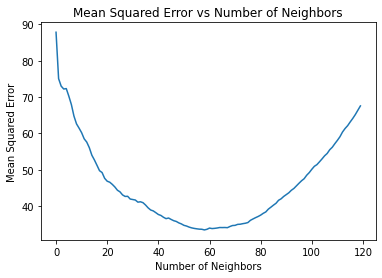

In [ ]:
nneighbors_mse = pd.DataFrame(nneighbors_mse_vals)
nneighbors_mse.plot(title='Mean Squared Error vs Number of Neighbors',
                    xlabel='Number of Neighbors',
                    ylabel='Mean Squared Error',
                    legend=False)

In [ ]:
print('The most optimal number of neighbors is', 
        nneighbors_mse.min(axis=1).idxmin())

The most optimal number of neighbors is 58


In [ ]:
knr = KNeighborsRegressor(n_neighbors=58).fit(x_train, y_train)

knr_pred = knr.predict(x_test)

knr_mse = mean_squared_error(y_test, knr_pred) 
knr_R2 = r2_score(y_test, knr_pred)

print('Random Forest Regression MSE: {}'.format(knr_mse))
print('Random Forest Regression RMSE: {}'.format(knr_mse**.5))
print('Random Forest Regression R2: {}'.format(knr_R2))

Random Forest Regression MSE: 33.643219719642595
Random Forest Regression RMSE: 5.8002775553970345
Random Forest Regression R2: 0.14294409134936747


This is better! But let's see if there are some other hyperparameters that we could tune for better performance.

#### Finding Optimal Number of Leaves

In [ ]:
leaf_mse_vals = []

for leaf_size in range(120):
  leaf_size = leaf_size + 1

  model = KNeighborsRegressor(n_neighbors = 58, 
                              leaf_size=leaf_size,
                              algorithm='ball_tree')

  model.fit(x_train, y_train)
  pred = model.predict(x_test)
  mse = mean_squared_error(y_test, pred)
  leaf_mse_vals.append(mse)
  #print('MSE for leaf size= ', leaf_size, 'is: ', mse)

<AxesSubplot:title={'center':'Mean Squared Error vs Leaf Size (Ball Tree)'}, xlabel='Leaf Size', ylabel='Mean Squared Error'>

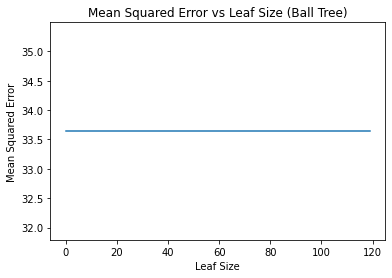

In [ ]:
leaf_size_mse = pd.DataFrame(leaf_mse_vals)
leaf_size_mse.plot(title='Mean Squared Error vs Leaf Size (Ball Tree)',
                   xlabel='Leaf Size',
                   ylabel='Mean Squared Error',
                   legend=False)

In [ ]:
leaf_mse_vals = []

for leaf_size in range(120):
  leaf_size = leaf_size + 1

  model = KNeighborsRegressor(n_neighbors = 58, 
                              leaf_size=leaf_size,
                              algorithm='kd_tree')

  model.fit(x_train, y_train)
  pred = model.predict(x_test)
  mse = mean_squared_error(y_test, pred)
  leaf_mse_vals.append(mse)
  #print('MSE for leaf size= ', leaf_size, 'is: ', mse)

<AxesSubplot:title={'center':'Mean Squared Error vs Leaf Size (KD Tree)'}, xlabel='Leaf Size', ylabel='Mean Squared Error'>

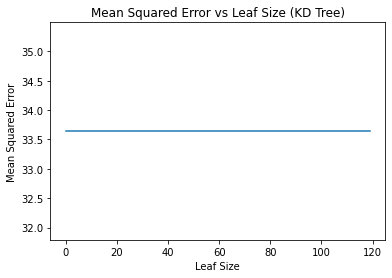

In [ ]:
leaf_size_mse = pd.DataFrame(leaf_mse_vals)
leaf_size_mse.plot(title='Mean Squared Error vs Leaf Size (KD Tree)',
                   xlabel='Leaf Size',
                   ylabel='Mean Squared Error',
                   legend=False)

We can see that leaf size makes no difference in model performance.

Let's see how the weight function used impacts performance.

#### Finding Optimal Weight Function

In [ ]:
uniform_model = KNeighborsRegressor(n_neighbors=58,
                                    weights='uniform').fit(x_train, y_train)

uniform_pred = uniform_model.predict(x_test)
uniform_mse = mean_squared_error(y_test, uniform_pred)
print('MSE for uniform weighted model is', uniform_mse)

MSE for uniform weighted model is 33.643219719642595


In [ ]:
distance_model = KNeighborsRegressor(n_neighbors=58,
                                     weights='distance').fit(x_train, y_train)

distance_pred = distance_model.predict(x_test)
distance_mse = mean_squared_error(y_test, distance_pred)
print('MSE for uniform weighted model is', distance_mse)

MSE for uniform weighted model is 32.20417896788251


We can see here that we get a slight performance edge in the distance weighted model.

Let's try a custom weighting function.

In [ ]:
import numpy as np
#from numpy import array
weights_distances = []

def customized_weights(distances: np.array)->np.array:

  # create a new array called weights with all zeros, and in the same dimension
  # as the distances array
  weights: np.array = np.array(np.full(distances.shape, 0), dtype='float')

  for i in range(distances.shape[0]): # for every prediction
    for j in range(distances.shape[1]):
      new_weight = pow(distances[i, j], 0.5)
      #print('Distance: ', distances[i, j], 'New weight', new_weight)
      new_instance = [distances[i, j], new_weight]
      weights_distances.append(new_instance)
      weights[i, j] = new_weight

  return weights

In [ ]:
distance_model = KNeighborsRegressor(n_neighbors=58,
                                     weights=customized_weights).fit(x_train, y_train)

distance_pred = distance_model.predict(x_test)
distance_mse = mean_squared_error(y_test, distance_pred)
print('MSE for uniform weighted model is', distance_mse)

MSE for uniform weighted model is 34.52825047104849


Unfortunately, there was no improvement with this function.

Let's look at the different algorithms.

#### Finding Optimal Algorithm 
The algorithm is used to compute the nearest neighbors.

In [ ]:
ball_tree = KNeighborsRegressor(n_neighbors=58,
                                algorithm='ball_tree',
                                weights='distance').fit(x_train, y_train)
ball_tree_pred = ball_tree.predict(x_test)
ball_tree_mse = mean_squared_error(y_test, ball_tree_pred)
print('MSE for ball tree algorithm model is', ball_tree_mse)

MSE for ball tree algorithm model is 32.204178967879415


In [ ]:
kd_tree = KNeighborsRegressor(n_neighbors=58,
                              algorithm='kd_tree',
                              weights='distance').fit(x_train, y_train)
kd_tree_pred = kd_tree.predict(x_test)
kd_tree_mse = mean_squared_error(y_test, kd_tree_pred)
print('MSE for kd tree algorithm model is', kd_tree_mse)

MSE for kd tree algorithm model is 32.204178967879415


In [ ]:
brute = KNeighborsRegressor(n_neighbors=58,
                            algorithm='brute',
                            weights='distance').fit(x_train, y_train)
brute_pred = brute.predict(x_test)
brute_mse = mean_squared_error(y_test, brute_pred)
print('MSE for brute algorithm model is', brute_mse)

MSE for brute algorithm model is 32.20417896788251


We can see that the algorithm does not make a difference.

Next, we're going to test which distance metric works best. For this, we'll be using a GridSearch to make the process easier.

#### Finding Optimal Distance Metric

In [ ]:
from sklearn.metrics.pairwise import *

In [ ]:
# Commented out to reduce runtime as optimal hyperparameters have been found.

# scoring = ['neg_mean_squared_error']

# param_grid = [
#     {'n_neighbors': [58],
#      'weights': ['distance'],
#      'algorithm': ['ball_tree'],
#      'leaf_size': [30],
#      'metric': ['cityblock', 'cosine', 'euclidean', 'haversine', 'l1', 'l2',
#                 'manhattan', 'nan_euclidean']
#      }
# ]

# clf = GridSearchCV(estimator=KNeighborsRegressor(),
#                    param_grid=param_grid,
#                    scoring=scoring,
#                    refit='neg_mean_squared_error')

# clf.fit(x_train, y_train)
# pred = clf.predict(x_test)
# knr_mse = mean_squared_error(y_test, pred) 
# knr_R2 = r2_score(y_test, pred)

# print('Random Forest Regression MSE: {}'.format(knr_mse))
# print('Random Forest Regression RMSE: {}'.format(knr_mse**.5))
# print('Random Forest Regression R2: {}'.format(knr_R2))

In [ ]:
#clf.best_params_

#### Final Model and Testing

Now we have our final hyperparameters!

The most optimal number of neighbors was found to be 58. The most optimal algorithm used to compute the nearest neighbors was found to be of no consequence. The weight function that was most optimal was the distance function. And number of leaves was found to not matter.

As such, we will use:  

```
n_neighbors = 58  
algorithm = ball_tree  
weights = distance  
leaf_size = 30 (default)  
metric = euclidean
```

  

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
knnr_scores = []
def knnr_func(x_train, y_train, x_test, y_test, days_out):
  # inputs: x_train: training data, inputs
  #         y_train: training data, results
  #         x_test: testing data, inputs
  #         y_test: testing data, results
  # outputs: predicted values for test data, in a list
  

  # First, make a pipeline with a scaler and a LinearSVR object
  # The LinearSVR object is a linear support vector regression from scikit-learn
  knnr = KNeighborsRegressor(n_neighbors=58,
                             algorithm='ball_tree',
                             weights='distance',
                             leaf_size=30,
                             metric='euclidean'
                            ).fit(x_train, y_train)

  knnr_pred = knnr.predict(x_test)

  knnr_mse = mean_squared_error(y_test, knnr_pred) 
  knnr_R2 = r2_score(y_test, knnr_pred)

  print('Random Forest MSE: {}'.format(knnr_mse))
  print('Random Forest RMSE: {}'.format(knnr_mse**.5))
  print('Random Forest R2: {}'.format(knnr_R2))

  knnr_scores.append({'model_name':'K Nearest Neighbors Regression',
                        'days_out': days_out,
                        'r2': knnr_R2,
                        'mse': knnr_mse})
  return knnr_pred

In [ ]:
# go through each shift

for i in shifts:
  print(str(i) + ' day(s) out:')
  print('---------------')
  df_lag, shift = CreateLags(df, i)
  df_lag = CorrectColumnTypes(df_lag)
  x_train, y_train, x_test, y_test, train, test = SplitData(df, train_split, shift)

  # K Neighbors Regression
  print('K Neighbors Regression')
  knnr_pred = knnr_func(x_train, y_train, x_test, y_test, i)
  test2, profit_dollars = CalcProfit(test, knnr_pred, i)
  PlotModelResults_Plotly(train, test, knnr_pred, tickerSymbol, w, h, i, 'K Neighbors Regression')

1 day(s) out:
---------------
K Neighbors Regression
Random Forest MSE: 32.46588640815322
Random Forest RMSE: 5.697884380026784
Random Forest R2: 0.12458537281363224
Would have made: $ 73.0
Percentage of good trading days: 0.59


5 day(s) out:
---------------
K Neighbors Regression
Random Forest MSE: 31.20811598873434
Random Forest RMSE: 5.586422467799435
Random Forest R2: 0.16353956667598024
Would have made: $ 154.6
Percentage of good trading days: 0.55


10 day(s) out:
---------------
K Neighbors Regression
Random Forest MSE: 32.441453892220544
Random Forest RMSE: 5.695739977581538
Random Forest R2: 0.14426604701379264
Would have made: $ 331.9
Percentage of good trading days: 0.62


20 day(s) out:
---------------
K Neighbors Regression
Random Forest MSE: 32.204178967879415
Random Forest RMSE: 5.674872594858797
Random Forest R2: 0.17960343576899784
Would have made: $ 608.9
Percentage of good trading days: 0.66


## Final Results

In [ ]:
linreg_df = pd.DataFrame(linreg_scores)
mlpreg_df = pd.DataFrame(mlpreg_scores)
lsvr_df = pd.DataFrame(linsvm_scores)
rfr_df = pd.DataFrame(rfr_scores)
knnr_df = pd.DataFrame(knnr_scores)

In [ ]:
linreg_df.head()

,model_name,days_out,r2,mse
0,Linear Regression,1,0.349319,24.131335
1,Linear Regression,5,-5.674044,249.006804
2,Linear Regression,10,-17.828847,713.814359
3,Linear Regression,20,-41.724380,1677.120120


In [ ]:
mlpreg_df.head()

,model_name,days_out,r2,mse
0,MLP Regressor,1,0.991551,0.313333
1,MLP Regressor,5,0.970929,1.084633
2,MLP Regressor,10,0.894440,4.001868
3,MLP Regressor,20,0.603678,15.557393


In [ ]:
lsvr_df.head()

,model_name,days_out,r2,mse
0,Linear SVR,1,0.992827,0.266003
1,Linear SVR,5,0.970131,1.114412
2,Linear SVR,10,0.913481,3.279978
3,Linear SVR,20,0.693845,12.017921


In [ ]:
rfr_df.head()

,model_name,days_out,r2,mse
0,Random Forest Regression,1,0.509414,18.194029
1,Random Forest Regression,5,0.391558,22.700798
2,Random Forest Regression,10,0.343940,24.871667
3,Random Forest Regression,20,0.309797,27.093504


In [ ]:
knnr_df.head()

,model_name,days_out,r2,mse
0,K Nearest Neighbors Regression,1,0.124585,32.465886
1,K Nearest Neighbors Regression,5,0.163540,31.208116
2,K Nearest Neighbors Regression,10,0.144266,32.441454
3,K Nearest Neighbors Regression,20,0.179603,32.204179


In [ ]:
scores = pd.concat([lsvr_df, mlpreg_df])
scores = pd.concat([scores, rfr_df])
scores = pd.concat([scores, knnr_df])
scores

,model_name,days_out,r2,mse
0,Linear SVR,1,0.992827,0.266003
1,Linear SVR,5,0.970131,1.114412
2,Linear SVR,10,0.913481,3.279978
3,Linear SVR,20,0.693845,12.017921
0,MLP Regressor,1,0.991551,0.313333
1,MLP Regressor,5,0.970929,1.084633
2,MLP Regressor,10,0.894440,4.001868
3,MLP Regressor,20,0.603678,15.557393
0,Random Forest Regression,1,0.509414,18.194029
1,Random Forest Regression,5,0.391558,22.700798


In [ ]:
import plotly.express as px
fig = px.line(scores, 
              x='days_out', 
              y='mse', 
              color='model_name',
              title='Model vs. Mean Squared Error',
              labels={
                  'model_name': 'Model Name',
                  'days_out': 'Days Out',
                  'mse': 'Mean Squared Error'
              },
              markers = True)
fig.show()

In [ ]:
fig = px.line(scores, 
              x='days_out', 
              y='r2', 
              color='model_name',
              title='Model vs. R2 Score',
              labels={
                  'model_name': 'Model Name',
                  'days_out': 'Days Out',
                  'r2': 'R2 Score'
              },
              markers=True
              )
fig.update_layout(
    yaxis=dict(
        tickmode = 'array',
        tickvals = [0, 0.25, 0.50, 0.75, 1],
        ticktext = ['0', '0.25', '0.50', '0.75', '1']
    )
)
fig.show()